# 観測ロケットMOMO2号機UHFテレメトリ可視化

## 受信器PC1~3までの比較

### 環境
Python 3.5 Anaconda

グラフが日本語表示されない場合は... http://qiita.com/knknkn1162/items/be87cba14e38e2c0f656

### 外部モジュール
https://github.com/moble/quaternion
https://github.com/scivision/pymap3d

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from numpy import pi, deg2rad, rad2deg, sin, cos
import quaternion
import pymap3d as pm

%matplotlib inline
plt.rcParams["figure.figsize"] = (12,5)
%config InlineBackend.figure_format = 'retina'

In [7]:
df1_atti = pd.read_csv("./telem1/telem1_attitude.csv")
df1_command = pd.read_csv("./telem1/telem1_command_rf_and_voltages.csv")
df1_ecef = pd.read_csv("./telem1/telem1_ecef_ecefvel.csv")
df1_fireflyA = pd.read_csv("./telem1/telem1_ecef_gpsinfo_firefly_a.csv")
df1_fireflyB = pd.read_csv("./telem1/telem1_ecef_gpsinfo_firefly_b.csv")
df1_ggg = pd.read_csv("./telem1/telem1_ggg.csv")
df1_gimbal = pd.read_csv("./telem1/telem1_gimbal.csv")
df1_press = pd.read_csv("./telem1/telem1_pressure_gauges.csv")
df1_rssi = pd.read_csv("./telem1/telem1_receicer_rssi.csv")
df1_sensor = pd.read_csv("./telem1/telem1_sensors.csv")
df1_sequence = pd.read_csv("./telem1/telem1_sequence_and_valve.csv")
df1_temp = pd.read_csv("./telem1/telem1_temperatures.csv")

df2_atti = pd.read_csv("./telem2/telem2_attitude.csv")
df2_command = pd.read_csv("./telem2/telem2_command_rf_and_voltages.csv")
df2_ecef = pd.read_csv("./telem2/telem2_ecef_ecefvel.csv")
df2_fireflyA = pd.read_csv("./telem2/telem2_ecef_gpsinfo_firefly_a.csv")
df2_fireflyB = pd.read_csv("./telem2/telem2_ecef_gpsinfo_firefly_b.csv")
df2_ggg = pd.read_csv("./telem2/telem2_ggg.csv")
df2_gimbal = pd.read_csv("./telem2/telem2_gimbal.csv")
df2_press = pd.read_csv("./telem2/telem2_pressure_gauges.csv")
df2_rssi = pd.read_csv("./telem2/telem2_receicer_rssi.csv")
df2_sensor = pd.read_csv("./telem2/telem2_sensors.csv")
df2_sequence = pd.read_csv("./telem2/telem2_sequence_and_valve.csv")
df2_temp = pd.read_csv("./telem2/telem2_temperatures.csv")

df3_atti = pd.read_csv("./telem3/telem3_attitude.csv")
df3_command = pd.read_csv("./telem3/telem3_command_rf_and_voltages.csv")
df3_ecef = pd.read_csv("./telem3/telem3_ecef_ecefvel.csv")
df3_fireflyA = pd.read_csv("./telem3/telem3_ecef_gpsinfo_firefly_a.csv")
df3_fireflyB = pd.read_csv("./telem3/telem3_ecef_gpsinfo_firefly_b.csv")
df3_ggg = pd.read_csv("./telem3/telem3_ggg.csv")
df3_gimbal = pd.read_csv("./telem3/telem3_gimbal.csv")
df3_press = pd.read_csv("./telem3/telem3_pressure_gauges.csv")
df3_rssi = pd.read_csv("./telem3/telem3_receicer_rssi.csv")
df3_sensor = pd.read_csv("./telem3/telem3_sensors.csv")
df3_sequence = pd.read_csv("./telem3/telem3_sequence_and_valve.csv")
df3_temp = pd.read_csv("./telem3/telem3_temperatures.csv")


savename = "../../telemetry_plot/UHF_telemetry/MOMO2_UHF_"
source_txt = "(Source: UHF Telemetry)"

## 圧力履歴

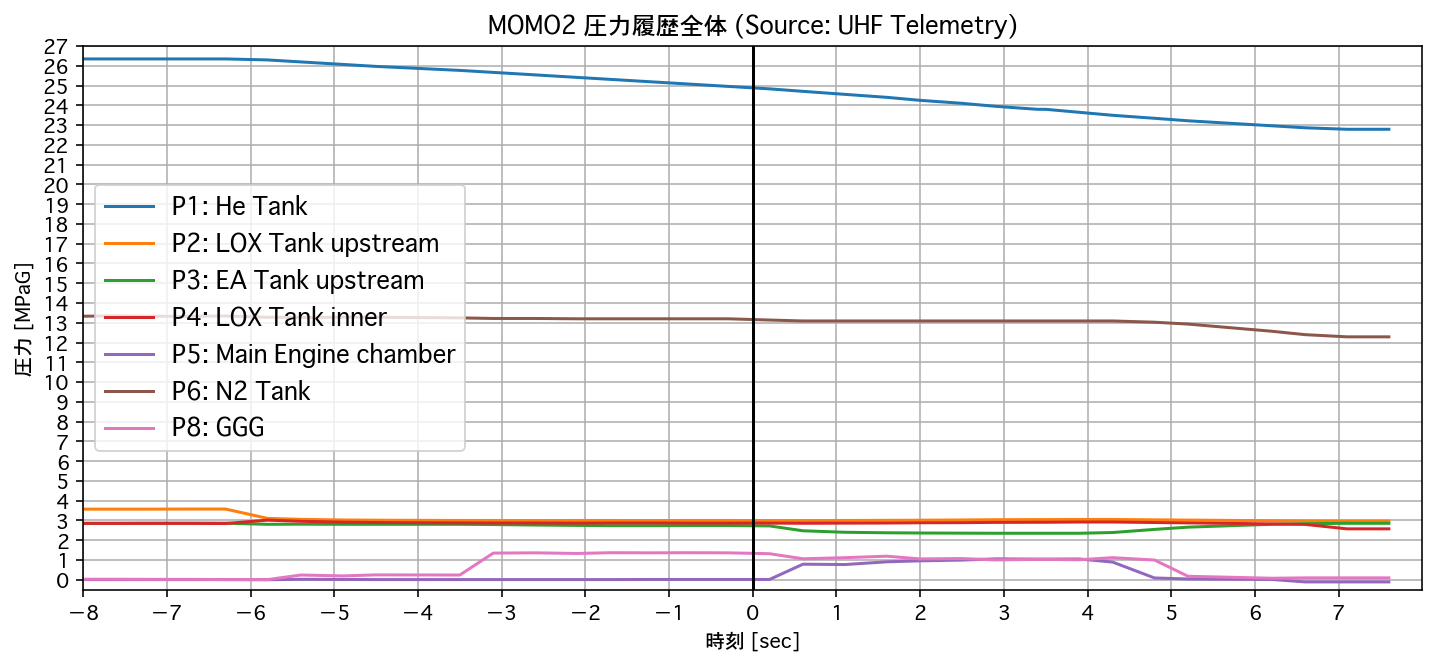

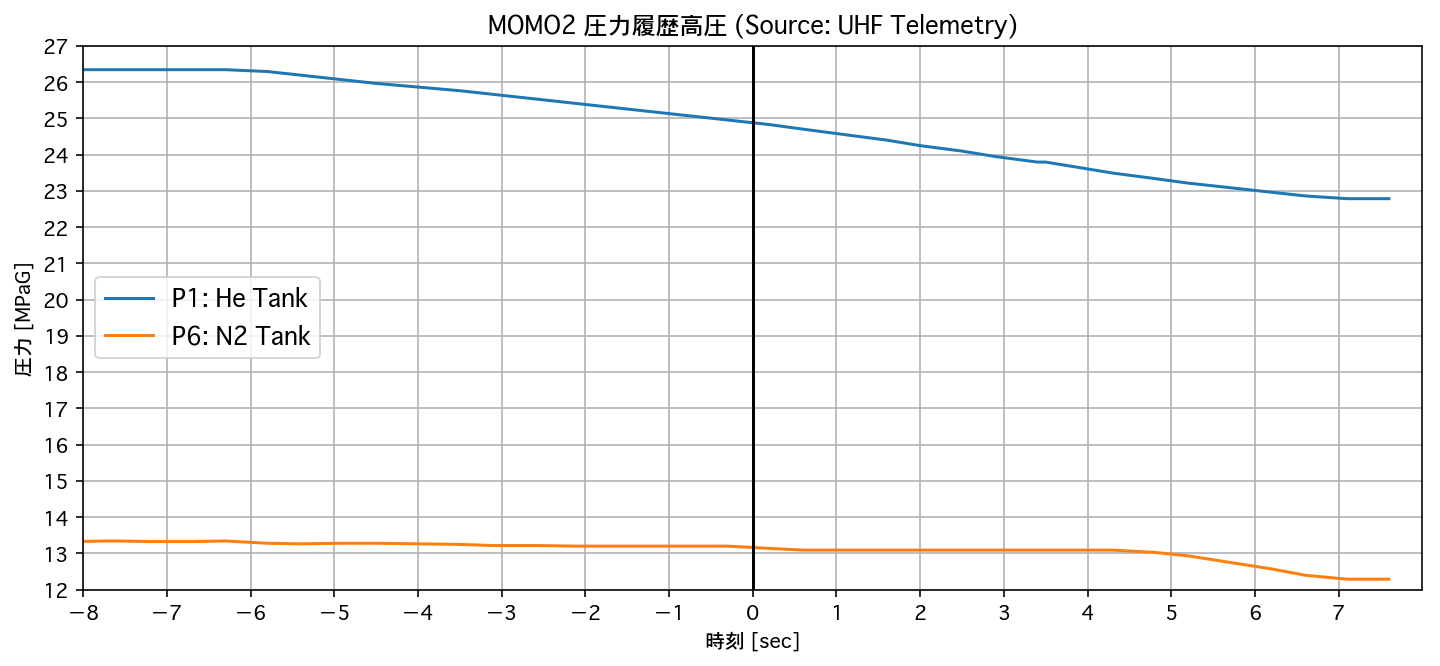

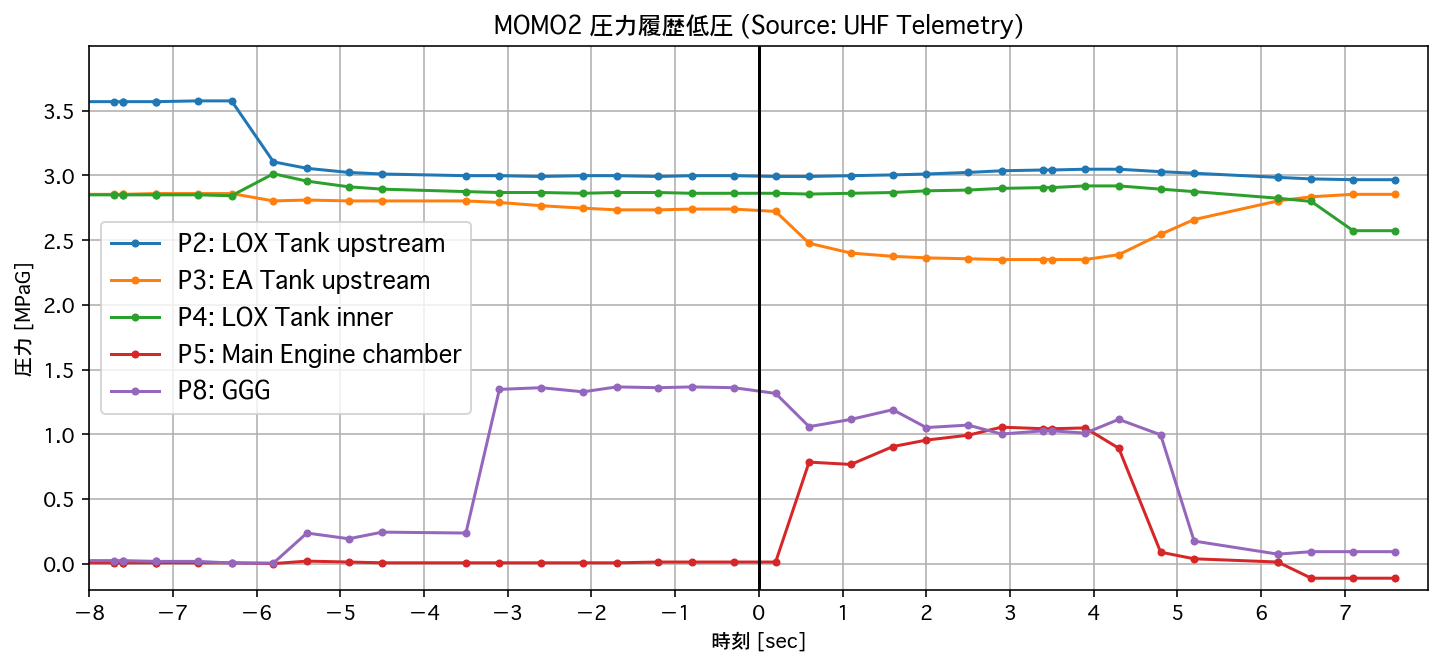

In [35]:
plt.figure()
plt.plot(df1_press["T[s]"], df1_press["P1[MPa]"], label="P1: He Tank")
plt.plot(df1_press["T[s]"], df1_press["P2[MPa]"], label="P2: LOX Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P3[MPa]"], label="P3: EA Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P4[MPa]"], label="P4: LOX Tank inner")
plt.plot(df1_press["T[s]"], df1_press["P5[MPa]"], label="P5: Main Engine chamber")
plt.plot(df1_press["T[s]"], df1_press["P6[MPa]"], label="P6: N2 Tank")
plt.plot(df1_press["T[s]"], df1_press["P8[MPa]"], label="P8: GGG")
plt.grid()
plt.legend(fontsize=12, loc="center left")
plt.title("MOMO2 圧力履歴全体 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(0,28))
plt.xticks(np.arange(-8,8,1))
plt.xlim([-8, 8])
plt.ylim([-0.5, 27])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df1_press["T[s]"], df1_press["P1[MPa]"], label="P1: He Tank")
plt.plot(df1_press["T[s]"], df1_press["P6[MPa]"], label="P6: N2 Tank")
plt.grid()
plt.legend(fontsize=12, loc="center left")
plt.title("MOMO2 圧力履歴高圧 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(11,28))
plt.xticks(np.arange(-8,8,1))
plt.xlim([-8, 8])
plt.ylim([12, 27])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df1_press["T[s]"], df1_press["P2[MPa]"], ".-", label="P2: LOX Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P3[MPa]"], ".-", label="P3: EA Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P4[MPa]"], ".-", label="P4: LOX Tank inner")
plt.plot(df1_press["T[s]"], df1_press["P5[MPa]"], ".-", label="P5: Main Engine chamber")
plt.plot(df1_press["T[s]"], df1_press["P8[MPa]"], ".-", label="P8: GGG")
plt.grid()
plt.legend(fontsize=12, loc="center left")
plt.title("MOMO2 圧力履歴低圧 " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(0,4, 0.5))
plt.xticks(np.arange(-8,8,1))
plt.xlim([-8, 8])
plt.ylim([-0.2, 4])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

## 圧力履歴の比較
受信機の違いによる差分を可視化する。
P1,P5の高圧側には大きな違いは見られなかった。

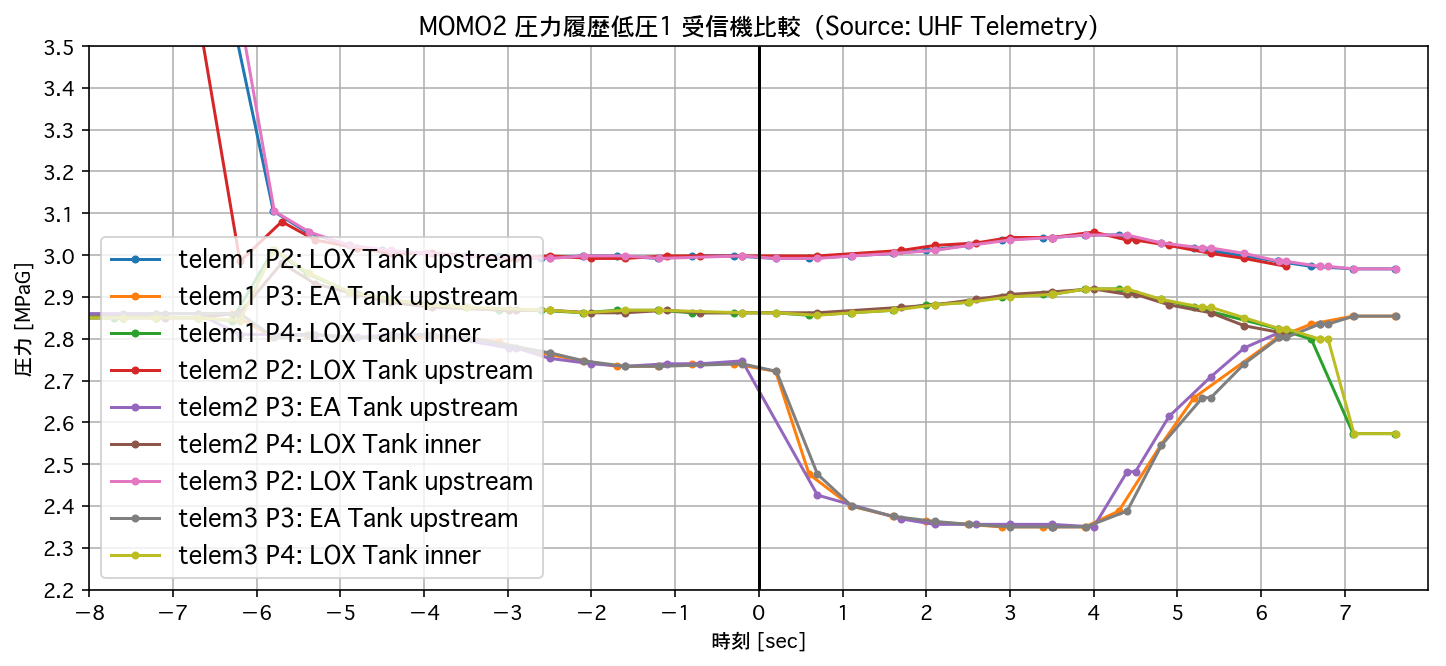

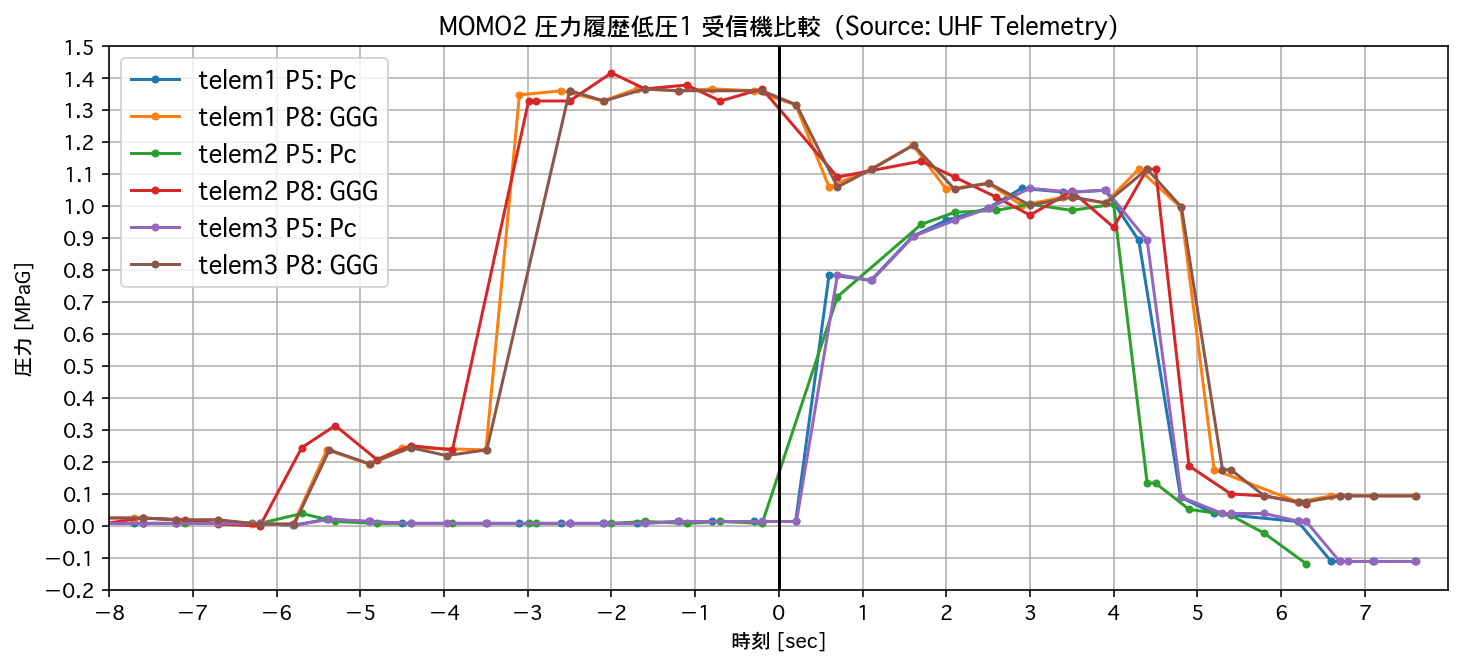

In [47]:
plt.figure()
plt.plot(df1_press["T[s]"], df1_press["P2[MPa]"], ".-", label="telem1 P2: LOX Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P3[MPa]"], ".-", label="telem1 P3: EA Tank upstream")
plt.plot(df1_press["T[s]"], df1_press["P4[MPa]"], ".-", label="telem1 P4: LOX Tank inner")
plt.plot(df2_press["T[s]"], df2_press["P2[MPa]"], ".-", label="telem2 P2: LOX Tank upstream")
plt.plot(df2_press["T[s]"], df2_press["P3[MPa]"], ".-", label="telem2 P3: EA Tank upstream")
plt.plot(df2_press["T[s]"], df2_press["P4[MPa]"], ".-", label="telem2 P4: LOX Tank inner")
plt.plot(df3_press["T[s]"], df3_press["P2[MPa]"], ".-", label="telem3 P2: LOX Tank upstream")
plt.plot(df3_press["T[s]"], df3_press["P3[MPa]"], ".-", label="telem3 P3: EA Tank upstream")
plt.plot(df3_press["T[s]"], df3_press["P4[MPa]"], ".-", label="telem3 P4: LOX Tank inner")
plt.grid()
plt.legend(fontsize=12, loc="lower left")
plt.title("MOMO2 圧力履歴低圧1 受信機比較  " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(0,4, 0.1))
plt.xticks(np.arange(-8,8,1))
plt.xlim([-8, 8])
plt.ylim([2.2, 3.5])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

plt.figure()
plt.plot(df1_press["T[s]"], df1_press["P5[MPa]"], ".-", label="telem1 P5: Pc")
plt.plot(df1_press["T[s]"], df1_press["P8[MPa]"], ".-", label="telem1 P8: GGG")
plt.plot(df2_press["T[s]"], df2_press["P5[MPa]"], ".-", label="telem2 P5: Pc")
plt.plot(df2_press["T[s]"], df2_press["P8[MPa]"], ".-", label="telem2 P8: GGG")
plt.plot(df3_press["T[s]"], df3_press["P5[MPa]"], ".-", label="telem3 P5: Pc")
plt.plot(df3_press["T[s]"], df3_press["P8[MPa]"], ".-", label="telem3 P8: GGG")
plt.grid()
plt.legend(fontsize=12, loc="upper left")
plt.title("MOMO2 圧力履歴低圧2 受信機比較  " + source_txt)
plt.xlabel("時刻 [sec]")
plt.ylabel("圧力 [MPaG]")
plt.yticks(np.arange(-0.4,2, 0.1))
plt.xticks(np.arange(-8,8,1))
plt.xlim([-8, 8])
plt.ylim([-0.2, 1.5])
plt.axvline(x=0, color="k")
# plt.savefig(savename + "pressure_high" + ".png")

## 加速度・ジャイロ